In [39]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [6]:
ames = pd.read_csv("/Users/jakeaaknes/Downloads/AmesHousing (2).csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()
ames

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [18]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')


array([-3.25778604e+20, -1.11398133e+20, -4.65615421e+19, -5.85460925e+21,
       -1.09610348e+19])

**Practice Activity Part 1**

In [27]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Linear Pipeline
ct = ColumnTransformer(
    [('dummify', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),
     make_column_selector(dtype_include=object)),
     ('standardize', StandardScaler(),
     make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
    [('preprocessing', ct),
     ('linear_regression', LinearRegression())]
)
# Our linear regression model
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
lr_pipeline_fitted.named_steps['linear_regression'].coef_
scores_lin = cross_val_score(lr_pipeline, X, y, cv = 5, scoring = 'r2')
scores_lin.mean()

-1.2698617121848888e+21

In [28]:
# Ridge Pipeline
ct = ColumnTransformer(
    [('dummify', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),
     make_column_selector(dtype_include=object)),
     ('standardize', StandardScaler(),
     make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
    [('preprocessing', ct),
     ('ridge_regression', Ridge(alpha=1))]
)
# Our linear regression model
ridge_pipeline_fitted = ridge_pipeline.fit(X_train, y_train)
ridge_pipeline_fitted.named_steps['ridge_regression'].coef_
scores_ridge = cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')
scores_ridge.mean()

0.8611593144036664

In [31]:
# Linear model fit on entire dataset
linear_fitted = lr_pipeline.fit(X, y)
# Ridge regression fit on entire dataset
ridge_fitted = ridge_pipeline.fit(X, y)

# Gathering coefficients
lin_coeff = lr_pipeline_fitted.named_steps['linear_regression'].coef_
ridge_coeff = ridge_pipeline_fitted.named_steps['ridge_regression'].coef_


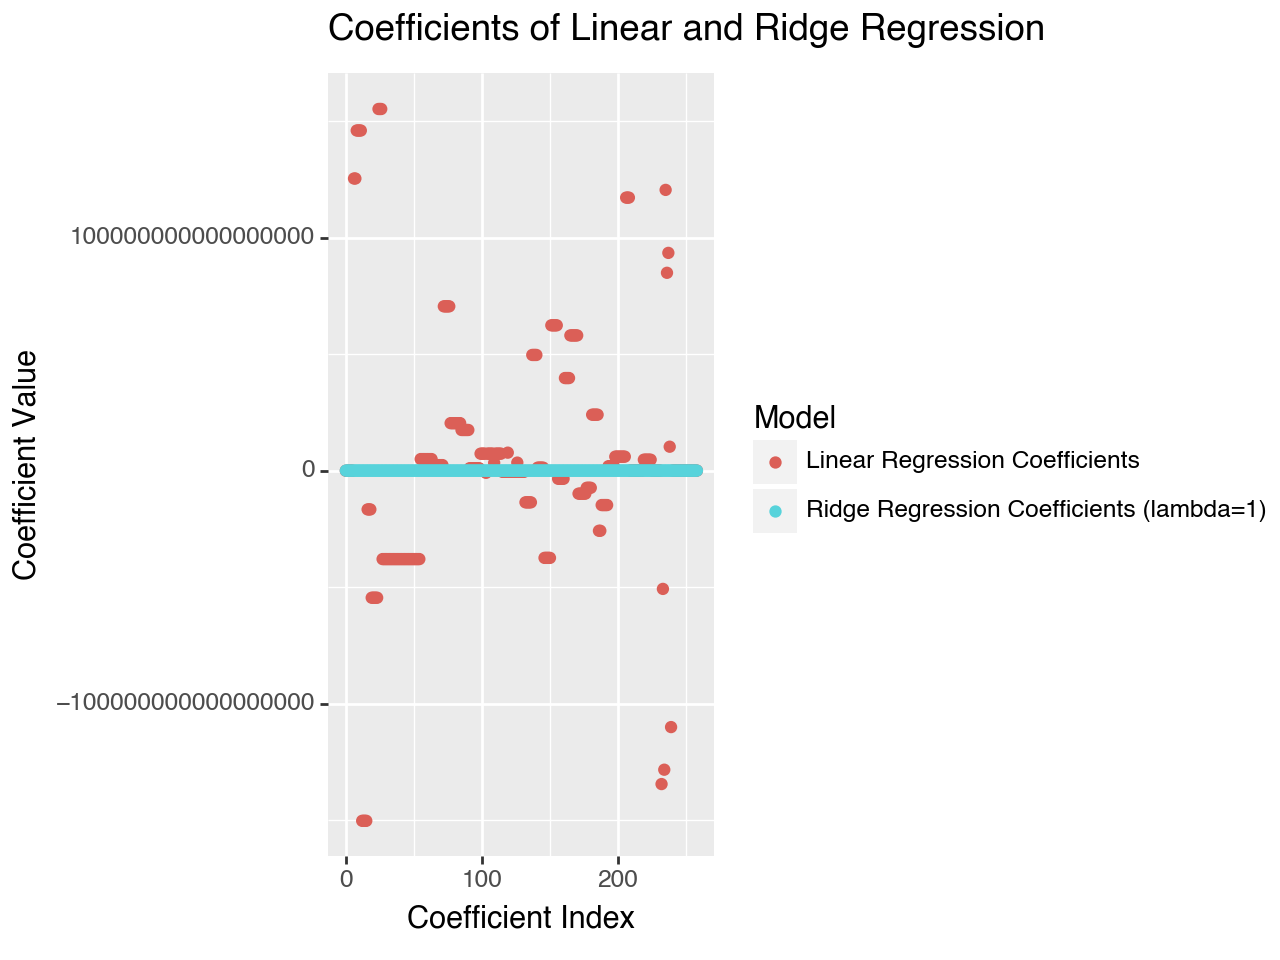

<Figure Size: (640 x 480)>

In [36]:
from plotnine import *

coefficients_df = pd.DataFrame({
    'Index': range(len(lin_coeff)),
    'Linear Regression Coefficients': lin_coeff,
    'Ridge Regression Coefficients (lambda=1)': ridge_coeff
})

# Melt the DataFrame for easier plotting
coefficients_df_melted = pd.melt(coefficients_df, id_vars=['Index'], var_name='Model', value_name='Coefficient Value')

# Plot using plotnine
(ggplot(coefficients_df_melted, aes(x='Index', y='Coefficient Value', color='Model')) +
 geom_point() +
 labs(title="Coefficients of Linear and Ridge Regression",
      x='Coefficient Index',
      y='Coefficient Value')
)

**Practice Activity Part 2**

In [40]:
result = [0.01, 0.1, 1, 10]

lambdas = {'ridge_regression__alpha': result}

gscv = GridSearchCV(ridge_pipeline, lambdas, cv = 5, scoring='r2')

In [41]:
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"lambdas": result, "scores": gscv_fitted.cv_results_['mean_test_score']})

,lambdas,scores
0,0.01,0.853224
1,0.10,0.855423
2,1.00,0.861159
3,10.00,0.863355


**Practice Activity Part 3**

In [42]:
lasso_pipeline = Pipeline(
    [('preprocessing', ct),
     ('lasso_regression', Lasso(alpha = 1))]
)

cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.688e+10, tolerance: 1.474e+09
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+10, tolerance: 1.463e+09
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.582e+10, tolerance: 1.477e+09


array([0.89890206, 0.91021274, 0.79352217, 0.7703388 , 0.90647455])

In [46]:
# Fit values for lasso regression
lasso_pipe_fitted = lasso_pipeline.fit(X, y)
coeff_lasso = lasso_pipe_fitted.named_steps['lasso_regression'].coef_

# Apply gscv with lambdas
lambdas = {'lasso_regression__alpha': result}

gscv = GridSearchCV(lasso_pipeline, lambdas, cv = 5, scoring='r2')
fitted_lasso = gscv.fit(X, y)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+10, tolerance: 1.793e+09
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+11, tolerance: 1.348e+09
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e+11, tolerance: 1.474e+09
/Applications/anaconda3/lib/python3.11/site

In [47]:
pd.DataFrame(data = {"lambdas": result, "scores": fitted_lasso.cv_results_['mean_test_score']})

,lambdas,scores
0,0.01,0.854549
1,0.10,0.855394
2,1.00,0.855890
3,10.00,0.859495


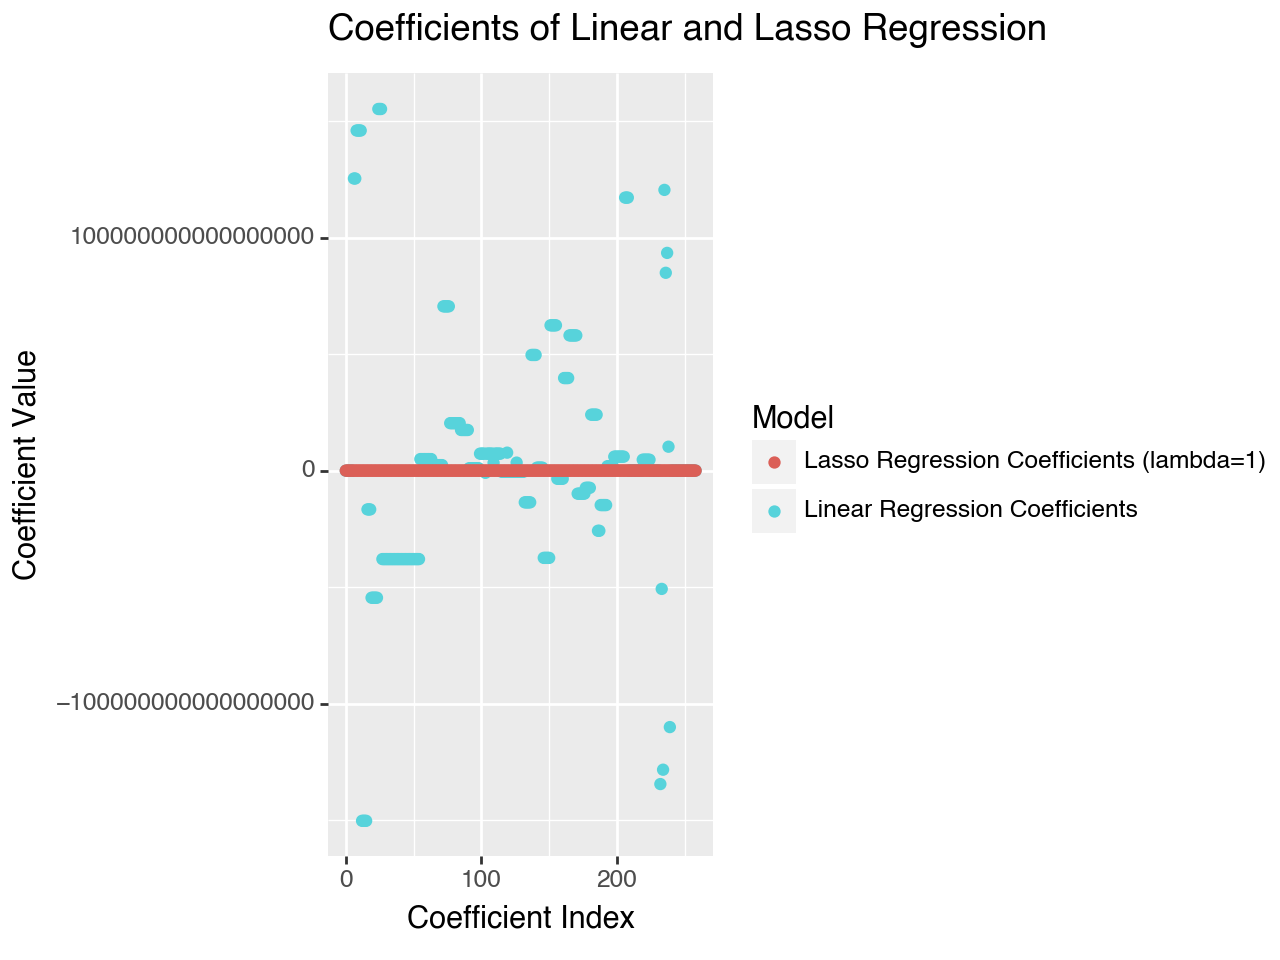

<Figure Size: (640 x 480)>

In [48]:
# Trying to plot
coeff_lasso = lasso_pipe_fitted.named_steps['lasso_regression'].coef_

coefficients_df = pd.DataFrame({
    'Index': range(len(lin_coeff)),
    'Linear Regression Coefficients': lin_coeff,
    'Lasso Regression Coefficients (lambda=1)': coeff_lasso
})

# Melt the DataFrame for easier plotting
coefficients_df_melted = pd.melt(coefficients_df, id_vars=['Index'], var_name='Model', value_name='Coefficient Value')

# Plot using plotnine
(ggplot(coefficients_df_melted, aes(x='Index', y='Coefficient Value', color='Model')) +
 geom_point() +
 labs(title="Coefficients of Linear and Lasso Regression",
      x='Coefficient Index',
      y='Coefficient Value')
)

**Elastic Regression**

In [50]:
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
   ("elastic_regression", ElasticNet())]
)


In [52]:
Elastic_grid = {
    'elastic_regression__alpha': [0.01, 0.1, 1, 10, 100],
    'elastic_regression__l1_ratio': [0.2, 0.4, 0.6, 0.8]
}

In [53]:
gscv = GridSearchCV(elastic_regression, Elastic_grid, cv = 5, scoring = 'r2')

fitted_Elastic = gscv.fit(X, y)

mean_elastic = gscv_fitted_Elastic.cv_results_['mean_test_score']

NameError: name 'elastic_regression' is not defined